#Environment import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import json
import shutil
import glob
import random
import time
import numpy as np
import cv2
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

from google.colab.patches import cv2_imshow
#Import the required libaries
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model, load_model

from keras.callbacks import ModelCheckpoint

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#Unzip and analyzing original datas:

1.   Training set: 31718
2.   Validation set: 4540
3.   Test A: 4514
4.   Test B: 4513

=> Just take "Training set" and "Validation set" thanks to its avalable anotations.

In [ ]:
%cd '/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets'

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets


In [ ]:
!unzip 'ai_challenger_pdr2018_trainingset_20181023.zip'

In [ ]:
len(os.listdir("./AgriculturalDisease_trainingset/images"))

31718

In [ ]:
!unzip 'ai_challenger_pdr2018_validationset_20181023.zip'

In [ ]:
len(os.listdir("./AgriculturalDisease_validationset/images"))

4540

In [ ]:
!unzip 'ai_challenger_pdr2018_testa_20181023.zip'

In [ ]:
len(os.listdir("./AgriculturalDisease_testA/images"))

4514

In [ ]:
!unzip 'ai_challenger_pdr2018_testb_20181023.zip'

In [ ]:
len(os.listdir("./AgriculturalDisease_testB/images"))

4513

#Building dataset from original datas

1.   Gray spot: 10, 11
2.   Rust: 12, 13
3.   Leaf spot: 14, 15

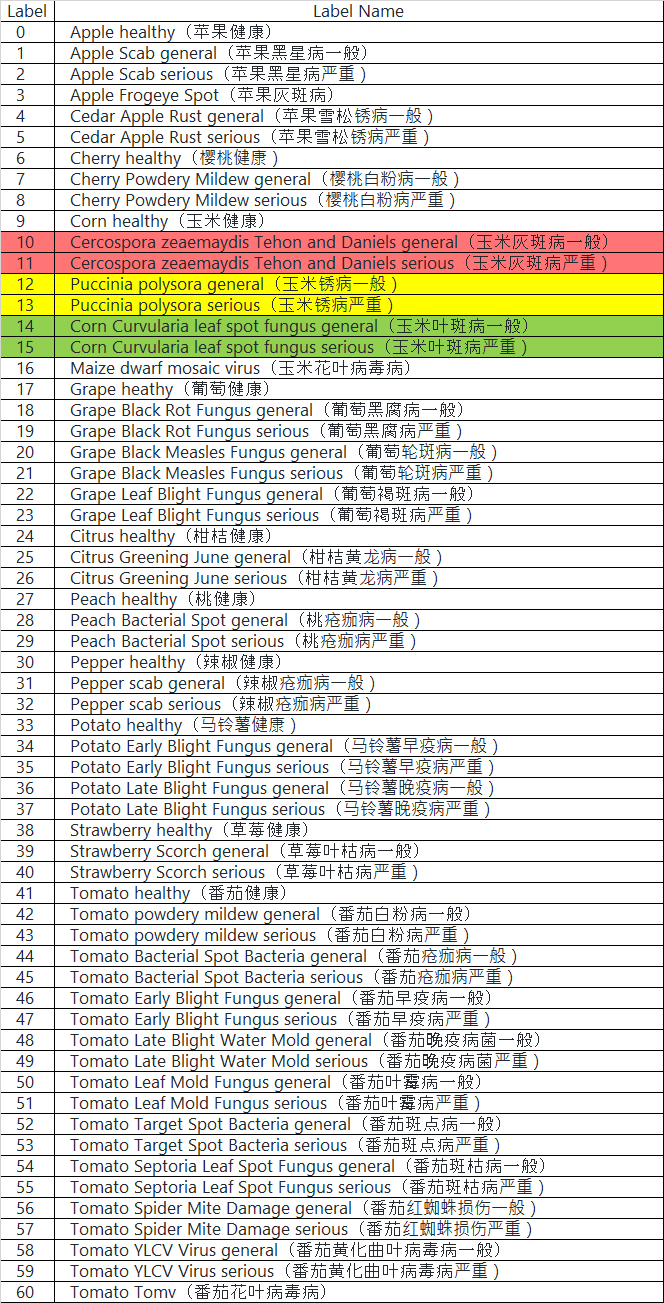

1.   Get all image which its anotation is **10**, **11** to GraySpotTemp folder; **12**, **13**  to RustTemp; **14**, **15** to LeafSpotTemp.
2.   Take randomly 300 samples in each three-folder, then move to another three folder: **GraySpot**, **Rust**, **LeafSpot**.



In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets
!mkdir TempDataset
%cd TempDataset
!mkdir GraySpotTemp
!mkdir RustTemp
!mkdir LeafSpotTemp
%cd ../

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets


In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/TempDataset

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/TempDataset


Anotaion file is a json file which its contents is as below:





```
[
    {
        "disease_class": 1, 
        "image_id": "62fd8bf4d53a1b94fbac16738406f10b.jpg"
    }, 
    {
        "disease_class": 1, 
        "image_id": "0bdec5cccbcade6b6e94087cb5509d98.jpg"
    }, 
    {
        "disease_class": 1, 
        "image_id": "8951e940341f77c8d361c1872c67b16d.jpg"
    },
    .......
]
```




In [ ]:
prefixgray = "./TempDataset/GraySpotTemp/"
prefixrust = "./TempDataset/RustTemp/"
prefixleaf = "./TempDataset/LeafSpotTemp/"

prefixori = "./AgriculturalDisease_trainingset/images/"
with open("./AgriculturalDisease_trainingset/AgriculturalDisease_train_annotations.json") as json_file:
    data = json.load(json_file)
    for p in data:
        if (p['disease_class'] == 10) or (p['disease_class'] == 11):
          print(p['disease_class'])
          print(p['image_id'])
          shutil.copy2(prefixori+p['image_id'], prefixgray)

        if (p['disease_class'] == 12) or (p['disease_class'] == 13):
          print(p['disease_class'])
          print(p['image_id'])
          shutil.copy2(prefixori+p['image_id'], prefixrust)
        if (p['disease_class'] == 14) or (p['disease_class'] == 15):
          print(p['disease_class'])
          print(p['image_id'])
          shutil.copy2(prefixori+p['image_id'], prefixleaf)
        

In [ ]:
prefixgray = "./TempDataset/GraySpotTemp/"
prefixrust = "./TempDataset/RustTemp/"
prefixleaf = "./TempDataset/LeafSpotTemp/"

prefixori = "./AgriculturalDisease_validationset/images/"
with open("./AgriculturalDisease_validationset/AgriculturalDisease_validation_annotations.json") as json_file:
    data = json.load(json_file)
    for p in data:
        if (p['disease_class'] == 10) or (p['disease_class'] == 11):
          print(p['disease_class'])
          print(p['image_id'])
          shutil.copy2(prefixori+p['image_id'], prefixgray)

        if (p['disease_class'] == 12) or (p['disease_class'] == 13):
          print(p['disease_class'])
          print(p['image_id'])
          shutil.copy2(prefixori+p['image_id'], prefixrust)
        if (p['disease_class'] == 14) or (p['disease_class'] == 15):
          print(p['disease_class'])
          print(p['image_id'])
          shutil.copy2(prefixori+p['image_id'], prefixleaf)
        

In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets


In [ ]:
print("Gray Spot:",len(os.listdir("./TempDataset/GraySpotTemp")))
print("Rust:",len(os.listdir("./TempDataset/RustTemp")))
print("Leaf Spot:",len(os.listdir("./TempDataset/LeafSpotTemp")))

Gray Spot: 409
Rust: 958
Leaf Spot: 806


In [ ]:
!mkdir ExperimentalDataset
%cd ExperimentalDataset
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot
%cd ../

In [ ]:
n, t = 0, time.time()
for i in ["GraySpot","Rust","LeafSpot"]:
  pathsource = "./TempDataset/"+i+"Temp/*"
  files = sorted(glob.glob(pathsource))
  file_count = len(files)
  random_files = random.sample(range(0, file_count), file_count)
  t = time.time() - t 
  limit = 300
  start = 0
  for j in random_files:
    if(start<limit):
      shutil.copy2(files[random_files[j]], "./ExperimentalDataset/"+i+"/")
    else:
      break
    start = start + 1
  print(i)
  print(file_count)
  print("\n")

In [ ]:
print(len(glob.glob("/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/ExperimentalDataset/GraySpot/*")))
print(len(glob.glob("/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/ExperimentalDataset/LeafSpot/*")))
print(len(glob.glob("/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/ExperimentalDataset/Rust/*")))

300
300
300


#Image Resizing
Change all images to a fixed size of 224 × 224 pixels.


In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/ExperimentalDataset/
!ls

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/ExperimentalDataset
GraySpot  KMean  LeafSpot  outputimage1.png  outputimage.png  Rust


In [ ]:
!mkdir GraySpotResize
!mkdir RustResize
!mkdir LeafSpotResize

In [ ]:
for d in ["GraySpot","Rust","LeafSpot"]:
  for i in glob.glob("./"+d+"/*"):
    img_arr = cv2.imread(i)
    resized_arr = cv2.resize(img_arr, (224, 224))
    y = i.split("/")[-1]
    cv2.imwrite("./"+ d + "Resize/"+y, resized_arr)

In [ ]:
print("Gray Spot:",len(os.listdir("./GraySpotResize")))
print("Rust:",len(os.listdir("./RustResize")))
print("Leaf Spot:",len(os.listdir("./LeafSpotResize")))

Gray Spot: 300
Rust: 300
Leaf Spot: 300


#KMean prepocessing k = {2, 4, 8, 16, 32, 64}

In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo


In [ ]:
!mkdir KMean2
%cd KMean2
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot
%cd ../
!mkdir KMean4
%cd KMean4
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot
%cd ../
!mkdir KMean8
%cd KMean8
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot
%cd ../
!mkdir KMean16
%cd KMean16
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot
%cd ../
!mkdir KMean32
%cd KMean32
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot
%cd ../
!mkdir KMean64
%cd KMean64
!mkdir GraySpot
!mkdir Rust
!mkdir LeafSpot

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/KMean2
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/KMean4
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/KMean8
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/KMean16
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/KMean32
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/KMean64


In [ ]:
!pwd
!ls

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
data  KMean16  KMean2  KMean32	KMean4	KMean64  KMean8  Model_old


#Tiền xử lý ảnh với K-Mean

CV provides a kmean method which described as below:
```

double cv::kmeans(	
                    InputArray data,
                    int K,
                    InputOutputArray bestLabels,
                    TermCriteria criteria,
                    int attempts,
                    int flags,
                    OutputArray centers = noArray() 
                  )	
```



In [ ]:
for cl in ["GraySpot","LeafSpot","Rust"]:
  for i in tqdm(glob.glob("./PlantDiseaseDatasets/ExperimentalDataset/"+cl+"Resize/*")):
    
    picname = i.split("/")[-1]
    original_image = cv2.imread(i)
    for K in [2,4,8,16,32,64]:
      img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
      vectorized = img.reshape((-1,3))
      vectorized.shape

      #Chuyển đổi các giá trị unit8 thành float vì nó là yêu cầu của phương thức k-mean của OpenCV.
      
      vectorized = np.float32(vectorized)
      criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
      attempts=10

      ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
      center = np.uint8(center)
      res = center[label.flatten()]
      result_image = res.reshape((img.shape))
      convertedimage=cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)

      #cv2_imshow(convertedimage)
      outputpath = "./Demo/KMean"+ str(K)+"/"
      #print(outputpath+cl+"/"+picname)
      cv2.imwrite(outputpath+cl+"/"+picname, convertedimage)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
for i in ["KMean2","KMean4","KMean8","KMean16","KMean32","KMean64"]:
  print(i,": \n")
  print("GraySpot",len(glob.glob("/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/"+i+"/GraySpot/*")))
  print("LeafSpot",len(glob.glob("/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/"+i+"/LeafSpot/*")))
  print("Rust",len(glob.glob("/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/"+i+"//Rust/*")))

KMean2 : 

GraySpot 300
LeafSpot 300
Rust 300
KMean4 : 

GraySpot 300
LeafSpot 300
Rust 300
KMean8 : 

GraySpot 300
LeafSpot 300
Rust 300
KMean16 : 

GraySpot 300
LeafSpot 300
Rust 300
KMean32 : 

GraySpot 300
LeafSpot 300
Rust 300
KMean64 : 

GraySpot 300
LeafSpot 300
Rust 300


In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo
!ls

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
raw = cv2.imread('/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/PlantDiseaseDatasets/ExperimentalDataset/GraySpotResize/0b2098b98ed040c527edd5ca80d84cc9.jpg')
raw=cv2.cvtColor(raw,cv2.COLOR_BGR2RGB)
km2 = cv2.imread('./KMean2/GraySpot/0b2098b98ed040c527edd5ca80d84cc9.jpg')
km2=cv2.cvtColor(km2,cv2.COLOR_BGR2RGB)
km4 = cv2.imread('./KMean4/GraySpot/0b2098b98ed040c527edd5ca80d84cc9.jpg')
km4=cv2.cvtColor(km4,cv2.COLOR_BGR2RGB)
km8 = cv2.imread('./KMean8/GraySpot/0b2098b98ed040c527edd5ca80d84cc9.jpg')
km8=cv2.cvtColor(km8,cv2.COLOR_BGR2RGB)
km16 = cv2.imread('./KMean16/GraySpot/0b2098b98ed040c527edd5ca80d84cc9.jpg')
km16=cv2.cvtColor(km16,cv2.COLOR_BGR2RGB)
km32 = cv2.imread('./KMean32/GraySpot/0b2098b98ed040c527edd5ca80d84cc9.jpg')
km32=cv2.cvtColor(km32,cv2.COLOR_BGR2RGB)
km64 = cv2.imread('./KMean64/GraySpot/0b2098b98ed040c527edd5ca80d84cc9.jpg')
km64=cv2.cvtColor(km64,cv2.COLOR_BGR2RGB)

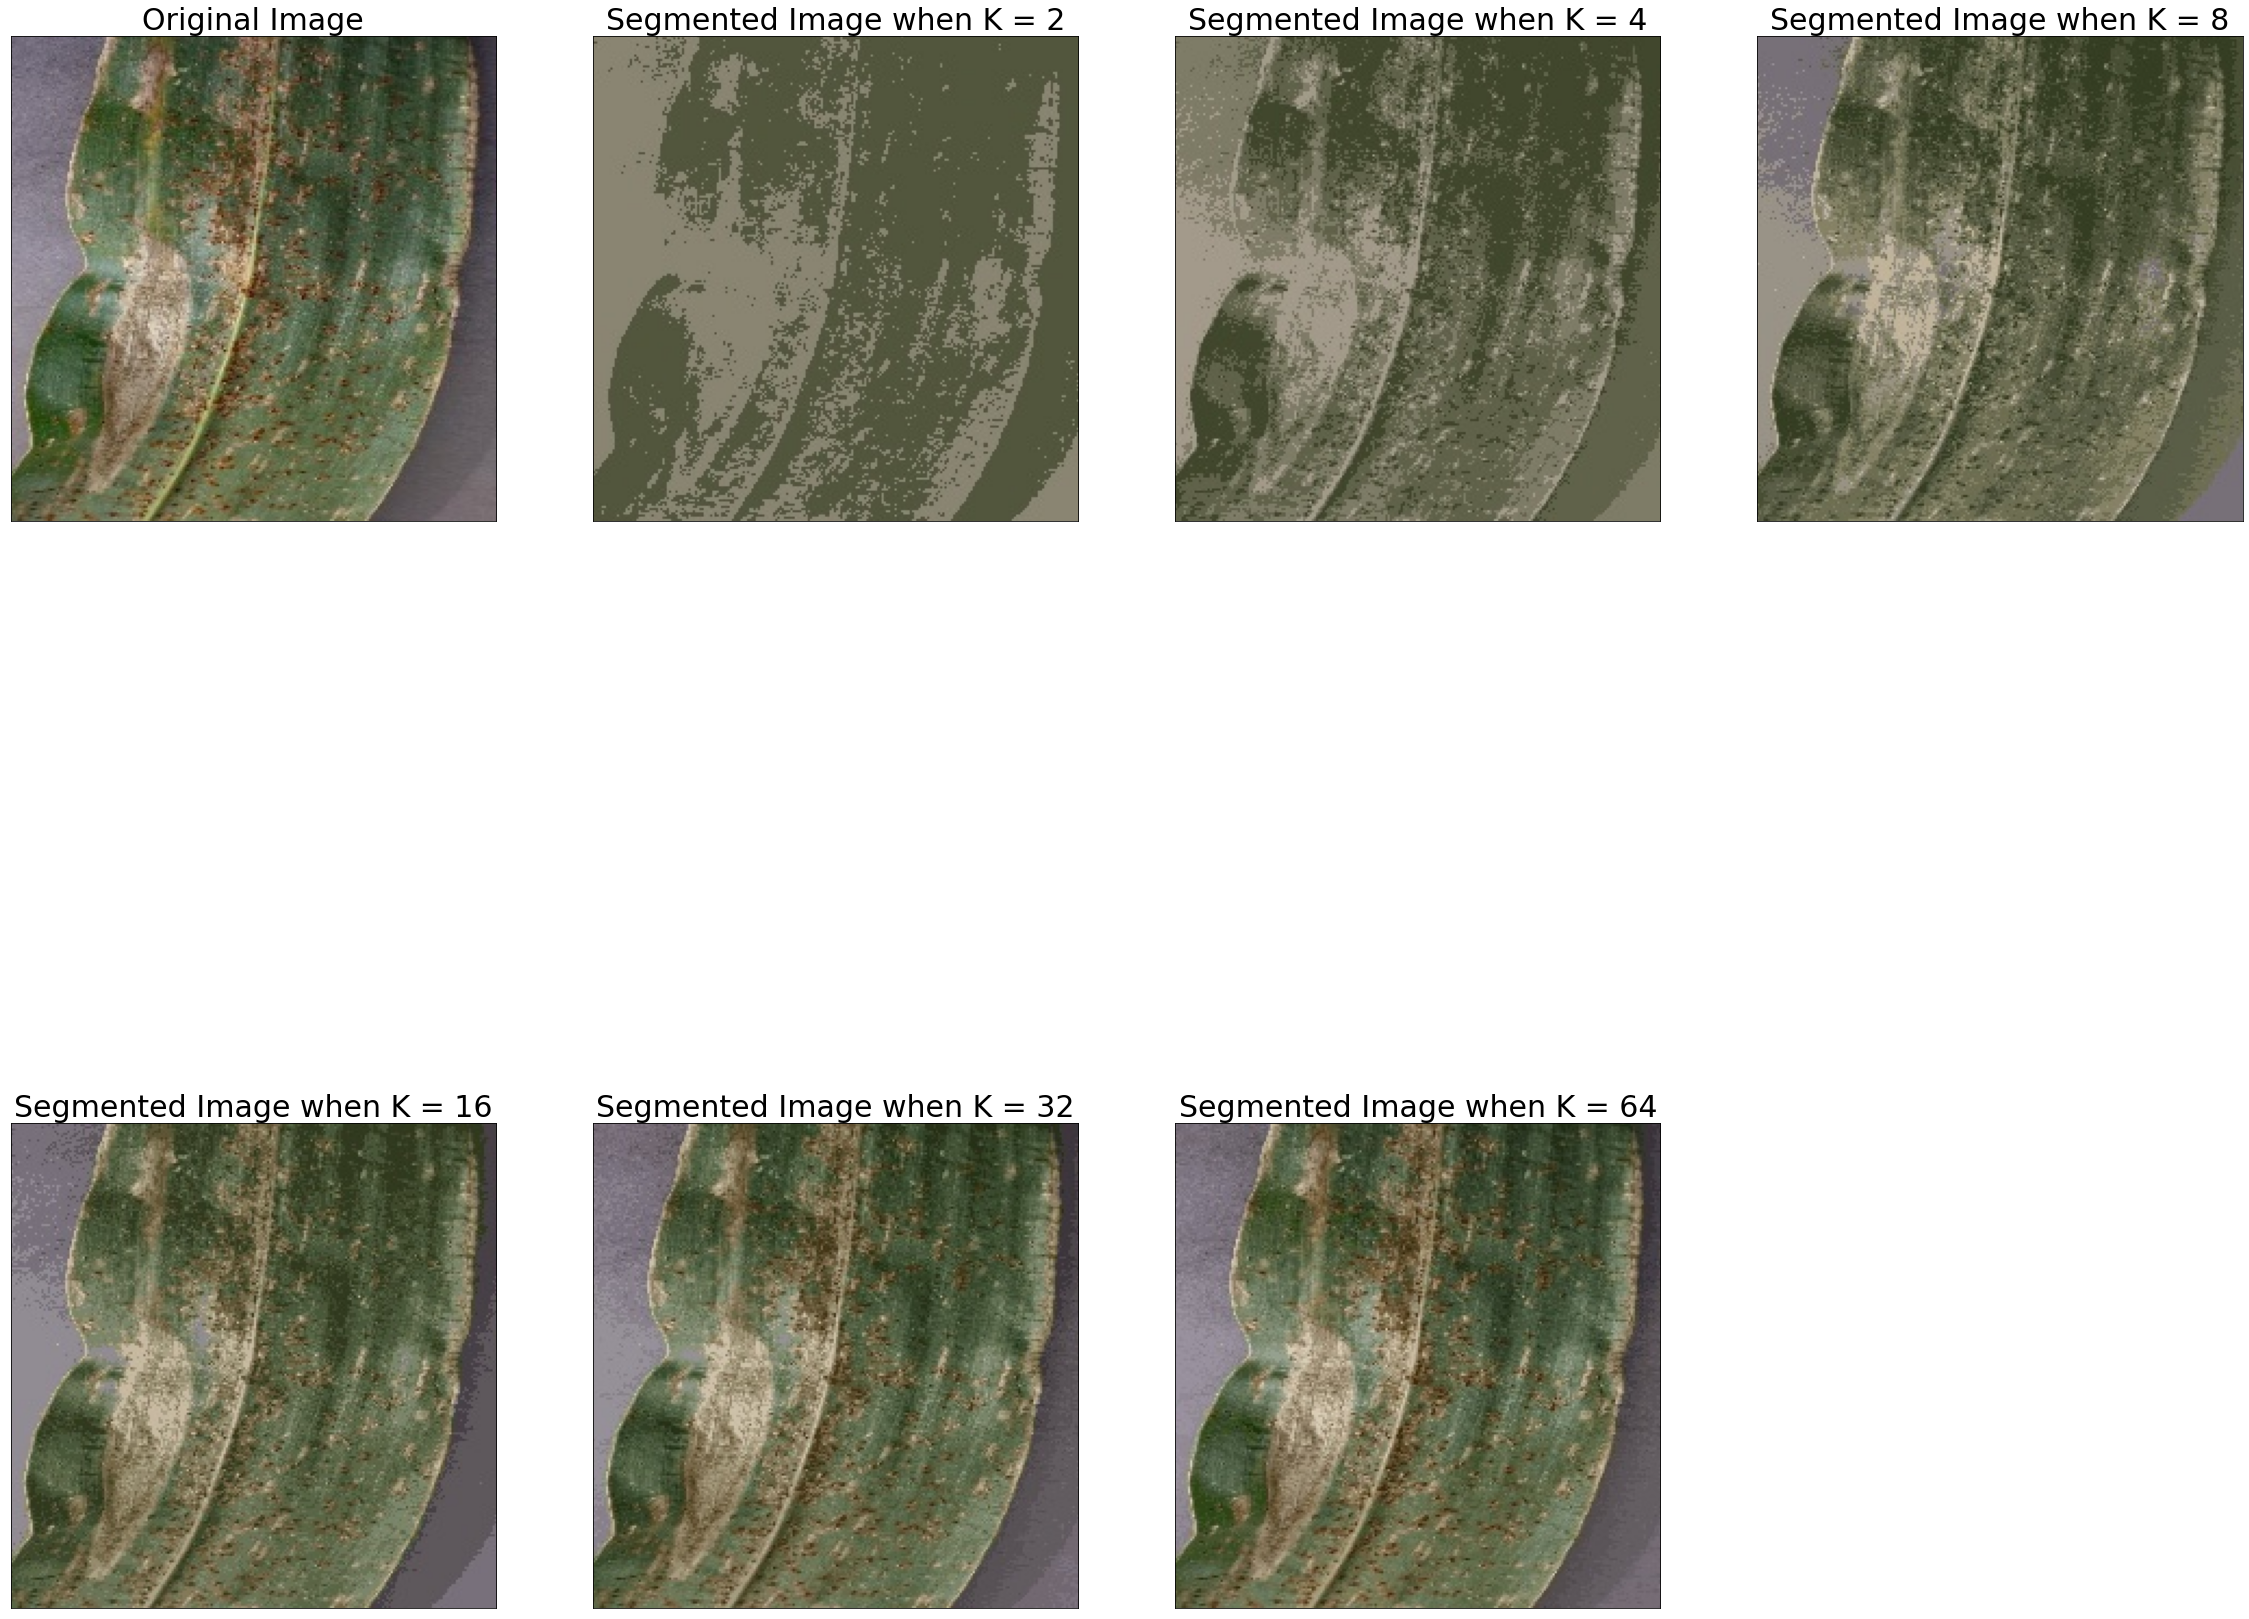

In [ ]:
figure_size = 40
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,4,1),plt.imshow(raw)
plt.title('Original Image', fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,2),plt.imshow(km2)
plt.title('Segmented Image when K = 2', fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,3),plt.imshow(km4)
plt.title('Segmented Image when K = 4', fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,4),plt.imshow(km8)
plt.title('Segmented Image when K = 8', fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,5),plt.imshow(km16)
plt.title('Segmented Image when K = 16', fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,6),plt.imshow(km32)
plt.title('Segmented Image when K = 32', fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,7),plt.imshow(km64)
plt.title('Segmented Image when K = 64', fontsize=30), plt.xticks([]), plt.yticks([])

plt.subplots_adjust(hspace=0.000005)
plt.show()

#Built Model

In [ ]:
IMG_SIZE = 224

##VGG16


In [ ]:
from tensorflow.keras.applications import VGG16
def build_model(num_classes):
    inputs = layers.Input(shape=(224, 224, 3))
    model = VGG16(include_top=True, input_tensor=inputs, weights="imagenet")

    model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # Freeze the pretrained weights
    model.trainable = False
    sm = Dense(num_classes, activation="softmax")(model.layers[-1].output)
    
    model = tf.keras.Model(inputs = model.inputs, outputs = sm)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy",f1_m,precision_m, recall_m], run_eagerly=True
    )
    model.summary()
    return model


##VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
def build_model(num_classes):
    inputs = layers.Input(shape=(224, 224, 3))
    model = VGG19(include_top=True, input_tensor=inputs, weights="imagenet")

    model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # Freeze the pretrained weights
    model.trainable = False
    sm = Dense(num_classes, activation="softmax")(model.layers[-1].output)
    
    model = tf.keras.Model(inputs = model.inputs, outputs = sm)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy",f1_m,precision_m, recall_m], run_eagerly=True
    )
    model.summary()
    return model

##Inception v3

In [ ]:
from tensorflow.keras.applications import InceptionV3
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = InceptionV3(include_top=True, input_tensor=inputs, weights="imagenet")

    model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # Freeze the pretrained weights
    model.trainable = False
    sm = Dense(num_classes, activation="softmax")(model.layers[-1].output)
    
    model = tf.keras.Model(inputs = model.inputs, outputs = sm)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy",f1_m,precision_m, recall_m], run_eagerly=True
    )
    #model.summary()
    return model


##ResNet18

In [ ]:
!pip install image-classifiers==0.2.2
!pip install image-classifiers==1.0.0b1

     |████████████████████████████████| 72 kB 691 kB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0b1-py3-none-any.whl size=19970 sha256=b2f47ca52303189c06fcb71569a77b20c6da1856a1068c24ad9f1b984700c131
  Stored in directory: /root/.cache/pip/wheels/62/1d/1d/d551ddb7ef02acac3373cb39ccd101661f28635a0d91febb69
Successfully built image-classifiers
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 0.2.2
    Uninstalling image-classifiers-0.2.2:
      Successfully uninstalled image-classifiers-0.2.2


In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-tabu5s1y
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-tabu5s1y
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20046 sha256=5feb3a8fd76d461957190c933ea3caac2c8751a3491c28b438b2956e9c10006d
  Stored in directory: /tmp/pip-ephem-wheel-cache-63f_z5_1/wheels/0b/96/56/27b17c903efc647c51e4f364bfc20aa67f8d3dccad63c4fb4e
Successfully built image-classifiers
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 1.0.0b1
    Uninstalling image-classifiers-1.0.0b1:
      Successfully uninstalled image-classifiers-1.0.0b1


In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions
from classification_models.keras import Classifiers



ResNet18, preprocess_input = Classifiers.get('resnet18')

def build_model(num_classes):
  # load model
  model = ResNet18(input_shape=(224,224,3), weights='/content/drive/MyDrive/Demo/resnet18_imagenet_1000.h5')

  model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
  # Freeze the pretrained weights
  model.trainable = False
  sm = Dense(3, activation="softmax")(model.layers[-1].output)

  model = tf.keras.Model(inputs = model.inputs, outputs = sm)
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
  model.compile(
      optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy",f1_m,precision_m, recall_m], run_eagerly=True
  )

  model.summary()
  return model

##Propose

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from tensorflow.keras.optimizers import Adam

def ProposeModel() :
    
    model = Sequential()
    #block1    
    model.add(Conv2D(filters=64 , kernel_size=(3,3) , padding='same', input_shape=(224,224,3) , activation='relu'))    
    model.add(MaxPool2D(pool_size=(2,2) , strides=2, padding='same'))

    #block2
    model.add(Conv2D(filters=128 , kernel_size=(3,3) , padding='same' , activation='relu'))    
    model.add(MaxPool2D(pool_size=(2,2) , strides=2, padding='same'))
     
    #block3
    model.add(Conv2D(filters=256 , kernel_size=(3,3) , padding='same' , activation='relu'))    
    model.add(MaxPool2D(pool_size=(2,2) , strides=2, padding='same'))
        
    #block4
    model.add(Conv2D(filters=512 , kernel_size=(3,3) , padding='same' , activation='relu'))    
    model.add(MaxPool2D(pool_size=(2,2) , strides=2, padding='same'))
        
    #block5
    model.add(Conv2D(filters=512 , kernel_size=(3,3) , padding='same' , activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2) , strides=2, padding='same'))
  

    model.add(Flatten())
    
    model.add(Dense(units=512 , activation='relu')) 
    
    model.add(Dense(units=3 , activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m], run_eagerly=True
    )
    model.summary()
    
    return model


#DataSplit + Traning and Verification

In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL


In [ ]:
labels = ["GraySpot","Rust","LeafSpot"]
X, y = [], []
for i in range(len(labels)):    
  path = os.path.join("./Demo/KMean32/", labels[i])
  for img in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
    X.append(img_arr)
    y.append(i)
  print('Finish for', labels[i])
X = np.array(X)
y = to_categorical(np.array(y), 3)

np.save('./Demo/KMean32/X.npy', X, 'wb')
np.save('./Demo/KMean32/y.npy', y, 'wb')

print(len(X))
#print(X_train)
print(len(y))
#print(y_train)

  0%|          | 0/300 [00:00<?, ?it/s]

Finish for GraySpot


  0%|          | 0/300 [00:00<?, ?it/s]

Finish for Rust


  0%|          | 0/300 [00:00<?, ?it/s]

Finish for LeafSpot
900
900


In [ ]:
X=np.load('./Demo/KMean32/X.npy', mmap_mode = 'r')
y=np.load('./Demo/KMean32/y.npy',mmap_mode = 'r')

In [ ]:
# Define K-Fold CV
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_idx = 1

for train_ids, val_ids in kfold.split(X, y):
  
  print("Bắt đầu chia dữ liệu Fold: ", fold_idx)
  np.save('./Demo/KMean32/X_train_f'+str(fold_idx)+'.npy', X[train_ids], 'wb')
  np.save('./Demo/KMean32/y_train_f'+str(fold_idx)+'.npy', y[train_ids], 'wb')
  np.save('./Demo/KMean32/X_val_f'+str(fold_idx)+'.npy', X[val_ids], 'wb')
  np.save('./Demo/KMean32/y_val_f'+str(fold_idx)+'.npy', y[val_ids], 'wb')
  
  # Sang Fold tiếp theo
  fold_idx = fold_idx + 1

Bắt đầu chia dữ liệu Fold:  1
Bắt đầu chia dữ liệu Fold:  2
Bắt đầu chia dữ liệu Fold:  3
Bắt đầu chia dữ liệu Fold:  4
Bắt đầu chia dữ liệu Fold:  5


In [ ]:
for t in range(1,6):
  print("Fold"+str(t)+": ")
  rustt=0
  grayt=0
  leaft=0
  rustv=0
  grayv=0
  leafv=0
  print("Train")
  
  X_train=np.load('./Demo/KMean32/X_train_f'+str(t)+'.npy', mmap_mode = 'r')
  y_train=np.load('./Demo/KMean32/y_train_f'+str(t)+'.npy',mmap_mode = 'r')
  len(X_train)
  len(y_train)
  for i in y_train:
    if(i[0]==1):
      rustt=rustt+1
    if(i[1]==1):
      grayt=grayt+1
    if(i[2]==1):
      leaft=leaft+1
  print("Rust train: ",rustt)
  print("Gray train: ",grayt)
  print("Leaf train: ",leaft)

  print("Val")
  
  X_val=np.load('./Demo/KMean32/X_val_f'+str(t)+'.npy', mmap_mode = 'r')
  y_val=np.load('./Demo/KMean32/y_val_f'+str(t)+'.npy', mmap_mode = 'r')
  len(X_val)
  len(y_val)
  for i in y_val:
    if(i[0]==1):
      rustv=rustv+1
    if(i[1]==1):
      grayv=grayv+1
    if(i[2]==1):
      leafv=leafv+1
  print("Rust val: ",rustv)
  print("Gray val: ",grayv)
  print("Leaf val: ",leafv)

Fold1: 
Train
Rust train:  242
Gray train:  239
Leaf train:  239
Val
Rust val:  58
Gray val:  61
Leaf val:  61
Fold2: 
Train
Rust train:  249
Gray train:  238
Leaf train:  233
Val
Rust val:  51
Gray val:  62
Leaf val:  67
Fold3: 
Train
Rust train:  238
Gray train:  243
Leaf train:  239
Val
Rust val:  62
Gray val:  57
Leaf val:  61
Fold4: 
Train
Rust train:  237
Gray train:  235
Leaf train:  248
Val
Rust val:  63
Gray val:  65
Leaf val:  52
Fold5: 
Train
Rust train:  234
Gray train:  245
Leaf train:  241
Val
Rust val:  66
Gray val:  55
Leaf val:  59


#Training

In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL

/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL


In [ ]:
fold = 1

In [ ]:
X_train = np.load('./Demo/KMean32/X_train_f'+str(fold)+'.npy', mmap_mode = 'r')
y_train = np.load('./Demo/KMean32/y_train_f'+str(fold)+'.npy', mmap_mode = 'r')
X_val = np.load('./Demo/KMean32/X_val_f'+str(fold)+'.npy', mmap_mode = 'r')
y_val = np.load('./Demo/KMean32/y_val_f'+str(fold)+'.npy', mmap_mode = 'r')

In [ ]:
rustt=0
grayt=0
leaft=0
rustv=0
grayv=0
leafv=0

for i in y_train:
  if(i[0]==1):
    rustt=rustt+1
  if(i[1]==1):
    grayt=grayt+1
  if(i[2]==1):
    leaft=leaft+1
print("Rust train: ",rustt)
print("Gray train: ",grayt)
print("Leaf train: ",leaft)

Rust train:  238
Gray train:  237
Leaf train:  245


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

720
720
180
180


In [ ]:
print('KMean32_Proposed_'+str(fold))
model = ProposeModel()
  
start = time.time()
# Train model
hist = model.fit(X_train, y_train,
            batch_size=30,
            epochs=50,
            verbose=1)
end = time.time()
print('Training time: ', end - start)
# Test và in kết quả


print("Save model Fold ", fold)
prefix = "/content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL/Demo/Model/"
name = 'KMean32_Proposed_'+str(fold)
print(prefix + name + '.h5')
model.save(prefix + name + '.h5')
print('Đã lưu mô hình!')



# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 
# or save to csv: 
hist_csv_file = prefix + name +'.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
print("Đã lưu lịch sử!")

accuracy_list = []
loss_list = []
f1_score_list = []
precision_list = []
recall_list = []
scores = model.evaluate(X_val, y_val, verbose=0)


print("Kết quả fold ", fold)

# Thêm thông tin accuracy và loss vào list
accuracy_list.append(scores[1] * 100)
loss_list.append(scores[0])

# Sang Fold tiếp theo
print('* Chi tiết các fold')
for i in range(0, len(accuracy_list)):
  print(f'> Fold {i+1} - Loss: {loss_list[i]} - Accuracy: {accuracy_list[i]}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')
print(f'> Loss: {np.mean(loss_list)}')

print("Đã đánh giá xong")

KMean32_Proposed_1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 

#Evaluating Model

In [ ]:
%cd /content/drive/MyDrive/TaiLieuHoc/Năm III/KTDL

accuracy: 0.5444444444444444
              precision    recall  f1-score  support
GraySpot       0.000000  0.000000  0.000000     62.0
Rust           1.000000  0.682540  0.811321     63.0
LeafSpot       0.401460  1.000000  0.572917     55.0
micro avg      0.544444  0.544444  0.544444    180.0
macro avg      0.467153  0.560847  0.461412    180.0
weighted avg   0.472668  0.544444  0.459020    180.0
samples avg    0.544444  0.544444  0.544444    180.0


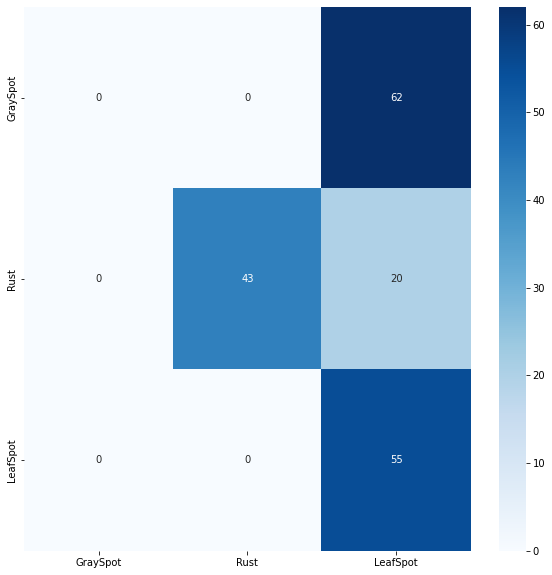

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

labels =  ["GraySpot","Rust","LeafSpot"]

y_val_pred = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred, axis = 1)
y_val_pred = np.eye(3)[y_val_pred]
#print(y_val_pred)
#print(y_val)
print("accuracy: " + str(accuracy_score(y_val, y_val_pred)))
report  = classification_report(y_val, y_val_pred, target_names = labels, output_dict = True)
report = pd.DataFrame(report).T
print(report)
#report.to_csv('VGG16_logistic.csv')
#report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(y_val.argmax(axis=1), y_val_pred.argmax(axis=1)),
            cmap="Blues", annot = True, annot_kws = {"size": 10}, 
            xticklabels = labels, yticklabels = labels)
plt.show()